In [5]:
import sys
sys.path.append("/Users/shvimas/Desktop/GitHub/diploma/src")

In [6]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
from data_helpers import read_data, array2str
import ls_pricing as ls
from pars_range import Range, ParsRange
import numpy as np

pl.rcParams["figure.figsize"] = (15, 9)

In [7]:
pl.rcParams["figure.figsize"] = (15, 9)

In [8]:
try:
    data, info = read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = read_data("SPH2_031612.csv")

In [9]:
day = 0
rate = .03
q = rate
maturity = info[day].mat / len(info)
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]
    
strikes = strikes[:-10]
prices = prices[:-10]

args = (spot, strikes, maturity, rate, q, is_call)

In [10]:
ls = reload(ls)

In [7]:
alpha_range = Range(min=1.417, max=1.417, num=1)
sigma_range = Range(min=.05, max=.09, num=20)

pars = ParsRange(model="ls", center=(1.417, .0718), widths=(.4, .02), dots=64)
pars.alpha_range = alpha_range
pars.sigma_range = sigma_range
print(pars.alpha_range.num)
print(pars.sigma_range.num)

1
20


In [8]:
predicted_alpha = []
for alpha, sigma in pars:
    predicted_alpha.append(strikes)
    predicted_alpha.append(ls.price_ls(pars=(alpha, sigma), args=args))

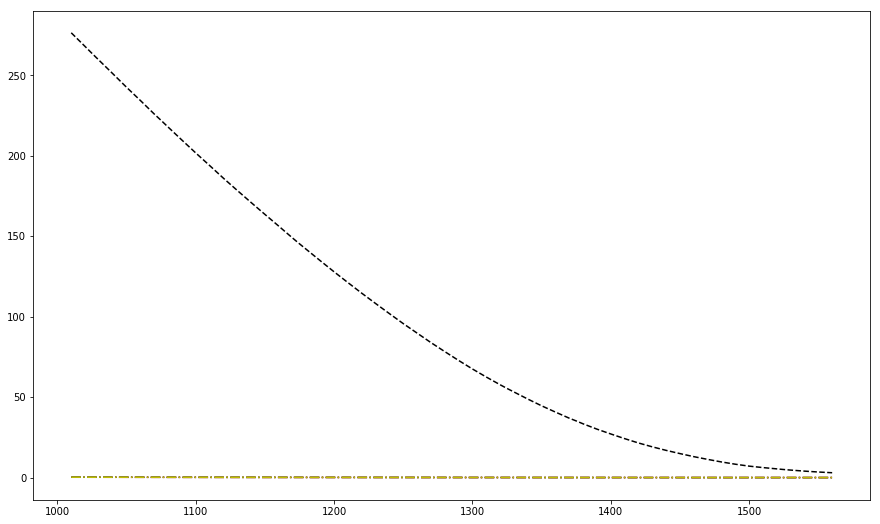

In [13]:
from structs import EvalArgs
args2 = EvalArgs.from_tuple(args)
args2.r = 0.0001

p = pl.plot(#*predicted_alpha, 
            strikes, prices, "k--", 
            strikes, ls.price_ls(pars=(1.41737596,  0.07191287), args=args2.as_tuple()), "r-.",
            strikes, ls.price_ls(pars=(1.32695262,  0.06663197), args=args), "m-.",
            strikes, ls.price_ls(pars=(1.14185719,  0.07361844), args=args2.as_tuple()), "g-.",
            strikes, ls.price_ls(pars=(1.02077429,  0.06171594), args=args2.as_tuple()), "y-.")

In [20]:
from optimization import robust_mean_ratio, mean_ratio
print(mean_ratio(predicted=ls.price_ls(pars=(1.99954862563, 0.999870404431), args=args), actual=prices))
mean_ratio(predicted=ls.price_ls(pars=(1.99954862563, 0.999870404431), args=args2.as_tuple()), 
           actual=prices)

32.4230519263


31.928819510230703

In [15]:
args2 = EvalArgs()
args2.r = .03
args2.q = .03
args2.maturity = .001
args2.strikes = np.array([100, 110, 90])
args2.spot = 100
args2.is_call = True

ls.price_ls(pars=(1.41737596,  1.7191287), args=args2.as_tuple())

array([  1.21874473e-02,   1.27236926e-06,   1.02817689e-01])

In [23]:
import modeling
modeling = reload(modeling)
ls = reload(ls)

In [36]:
res = modeling.tune_model(args=EvalArgs.from_tuple(args), 
                          model="ls", metric="mean ratio", prices=prices, 
                          bounds=((1.3, 1.5), (.05, .1)))

In [37]:
res

     fun: 1.0138516474592218
     jac: array([ 0.08844161,  0.23493294])
 message: 'Optimization terminated successfully.'
    nfev: 279
     nit: 6
 success: True
       x: array([ 1.35702891,  0.06854932])

In [21]:
new_args = EvalArgs.from_tuple(args)
new_args.r = .0001

In [29]:
res = modeling.tune_model(args=new_args, 
                          model="ls", metric="MAE", prices=prices, 
                          bounds=((1.001, 1.999), (.005, 1)))


In [30]:
res

     fun: 1.6728905274563299
     jac: array([ 3.35750578,  4.13793251])
 message: 'Optimization terminated successfully.'
    nfev: 669
     nit: 18
 success: True
       x: array([ 1.02077429,  0.06171594])

In [ ]:
def relative_diff(f, pars, args, prices):
    predicted = f(pars=pars, args=args)
    return (predicted - prices) / prices


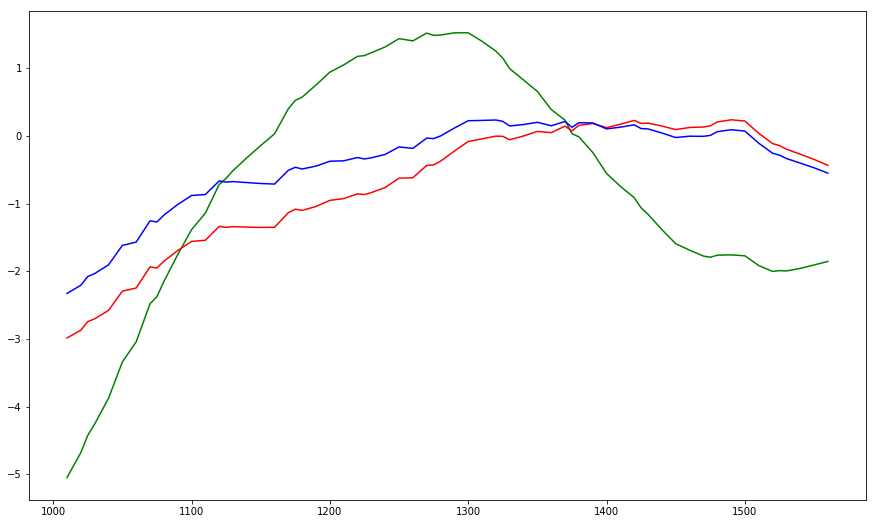

In [40]:
pl.plot(strikes, ls.price_ls(args=new_args.as_tuple(), pars=(1.06083698,  0.06261838)) - prices, "g",
        #strikes, ls.price_ls(args=new_args.as_tuple(), pars=(1.97393441,  0.02528949)) - prices, "y",
        strikes, ls.price_ls(pars=(1.35702891,  0.06854932), args=args) - prices, "r",
        strikes, ls.price_ls(pars=(1.34293434,  0.06775655), args=args) - prices, "b")


In [30]:
import numpy as np

print(np.mean(ls.price_ls(pars=(1.34293434,  0.06775655), args=args) - prices))
print(np.mean(ls.price_ls(pars=(1.06083698,  0.06261838), args=new_args.as_tuple()) - prices))

-0.413911480952
-0.710102857863


In [42]:
prices

array([ 276.5 ,  268.  ,  263.7 ,  259.5 ,  251.1 ,  242.6 ,  234.4 ,
        226.  ,  222.  ,  217.9 ,  209.8 ,  201.8 ,  194.  ,  186.1 ,
        182.3 ,  178.5 ,  171.  ,  163.6 ,  156.3 ,  148.9 ,  145.3 ,
        141.8 ,  134.8 ,  127.9 ,  121.2 ,  114.6 ,  111.4 ,  108.2 ,
        101.9 ,   95.7 ,   89.8 ,   83.9 ,   81.1 ,   78.3 ,   72.8 ,
         67.5 ,   62.5 ,   57.7 ,   55.4 ,   53.2 ,   48.8 ,   44.6 ,
         40.7 ,   36.9 ,   35.2 ,   33.4 ,   30.1 ,   27.1 ,   24.2 ,
         21.5 ,   20.3 ,   19.1 ,   16.9 ,   14.9 ,   13.  ,   11.3 ,
         10.5 ,    9.7 ,    8.3 ,    7.1 ,    6.2 ,    5.4 ,    5.  ,
          4.65,    4.  ,    3.45,    3.  ,    2.6 ,    2.4 ,    2.25,
          1.9 ,    1.65,    1.1 ,    0.85,    0.7 ,    0.55,    0.45])

In [ ]:
strikes > 20

In [12]:
print(pl.rcParams['axes.edgecolor'])

k


In [37]:
from scipy.optimize import differential_evolution


def f(p: tuple, *args) -> float:
    tmp = EvalArgs.from_tuple(args)
    tmp.r = p[0]
    return robust_mean_ratio(predicted=ls.price_ls(pars=p[1:], args=tmp.as_tuple()), actual=prices)


r1 = differential_evolution(func=f, args=args, bounds=((0, .2), (1.0001, 1.9999), (1e-6, 2)))
r1

     fun: 1.0046948903071264
     jac: array([ 0.00327613,  0.04419911,  0.20501234])
 message: 'Optimization terminated successfully.'
    nfev: 950
     nit: 17
 success: True
       x: array([ 0.03838801,  1.43761949,  0.06685587])

In [38]:
import vg_pricing as vg


def f(p: tuple, *args) -> float:
    tmp = EvalArgs.from_tuple(args)
    tmp.r = p[0]
    return robust_mean_ratio(predicted=vg.price_vg(pars=p[1:], args=tmp.as_tuple()), actual=prices)


r2 = differential_evolution(func=f, args=args, bounds=((0, .2), (1e-6, 1.), (-1, 1), (1e-6, 1.)))
r2

/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:72: RuntimeWarning: overflow encountered in power
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))
/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:72: RuntimeWarning: invalid value encountered in true_divide
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))
/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:72: RuntimeWarning: overflow encountered in true_divide
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))


/Users/shvimas/miniconda3/envs/untitled/lib/python3.6/site-packages/scipy/optimize/_differentialevolution.py:485: RuntimeWarning: invalid value encountered in absolute
  np.abs(np.mean(self.population_energies) + _MACHEPS))
/Users/shvimas/miniconda3/envs/untitled/lib/python3.6/site-packages/scipy/optimize/_differentialevolution.py:542: RuntimeWarning: invalid value encountered in absolute
  self.tol * np.abs(np.mean(self.population_energies)))
